# Metro-Bike-Share

Data Source: https://bikeshare.metro.net/about/data/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'metro-trips-2021.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,151713183,17,1/1/2021 1:45,1/1/2021 2:02,3005,34.048500,-118.258537,4304,34.062580,-118.290092,5894,1,One Way,Walk-up,standard
1,151713983,7,1/1/2021 2:35,1/1/2021 2:42,4390,34.069271,-118.296593,4456,34.052429,-118.302017,16901,365,One Way,Annual Pass,electric
2,151716483,8,1/1/2021 4:28,1/1/2021 4:36,3052,34.051102,-118.264557,4314,34.057709,-118.279762,6005,30,One Way,Monthly Pass,standard
3,151721185,208,1/1/2021 4:43,1/1/2021 8:11,3034,34.042061,-118.263382,3031,34.044701,-118.252441,5852,1,One Way,Walk-up,standard
4,151720984,129,1/1/2021 5:53,1/1/2021 8:02,4446,34.053230,-118.278419,4446,34.053230,-118.278419,12075,1,Round Trip,Walk-up,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220992,179408277,19,12/31/2021 23:29,12/31/2021 23:48,3033,34.040989,-118.255798,3011,34.041130,-118.267982,14027,1,One Way,One Day Pass,standard
220993,179408276,8,12/31/2021 23:40,12/31/2021 23:48,3031,34.044701,-118.252441,3030,34.051941,-118.243530,20006,365,One Way,Annual Pass,standard
220994,179409877,43,12/31/2021 23:47,1/1/2022 0:30,3031,34.044701,-118.252441,3031,34.044701,-118.252441,16214,1,Round Trip,Walk-up,standard
220995,179409876,42,12/31/2021 23:48,1/1/2022 0:30,3031,34.044701,-118.252441,3031,34.044701,-118.252441,13336,1,Round Trip,Walk-up,standard


In [5]:
df.shape

(220997, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220997 entries, 0 to 220996
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              220997 non-null  int64  
 1   duration             220997 non-null  int64  
 2   start_time           220997 non-null  object 
 3   end_time             220997 non-null  object 
 4   start_station        220997 non-null  int64  
 5   start_lat            220770 non-null  float64
 6   start_lon            220770 non-null  float64
 7   end_station          220997 non-null  int64  
 8   end_lat              215391 non-null  float64
 9   end_lon              215391 non-null  float64
 10  bike_id              220997 non-null  object 
 11  plan_duration        220997 non-null  int64  
 12  trip_route_category  220997 non-null  object 
 13  passholder_type      220996 non-null  object 
 14  bike_type            220997 non-null  object 
dtypes: float64(4), in

In [7]:
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime)   # convert dates to pandas datetime

In [8]:
df['day_name'] = df['start_time'].dt.day_name()                                          # add day name    
df['day'] = df['start_time'].dt.day                                                      # add day
df['month'] = df['start_time'].dt.month                                                  # add month

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220997 entries, 0 to 220996
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              220997 non-null  int64         
 1   duration             220997 non-null  int64         
 2   start_time           220997 non-null  datetime64[ns]
 3   end_time             220997 non-null  datetime64[ns]
 4   start_station        220997 non-null  int64         
 5   start_lat            220770 non-null  float64       
 6   start_lon            220770 non-null  float64       
 7   end_station          220997 non-null  int64         
 8   end_lat              215391 non-null  float64       
 9   end_lon              215391 non-null  float64       
 10  bike_id              220997 non-null  object        
 11  plan_duration        220997 non-null  int64         
 12  trip_route_category  220997 non-null  object        
 13  passholder_typ

# Missing Data Exploration

In [10]:
df.isna().sum()                                               # less than 1% missing data in (longitute and latitude) columns

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat               227
start_lon               227
end_station               0
end_lat                5606
end_lon                5606
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           1
bike_type                 0
day_name                  0
day                       0
month                     0
dtype: int64

In [11]:
df_drop = df.dropna()                                           # drop missing values
df_drop.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,day_name,day,month
0,151713183,17,2021-01-01 01:45:00,2021-01-01 02:02:00,3005,34.048500,-118.258537,4304,34.062580,-118.290092,5894,1,One Way,Walk-up,standard,Friday,1,1
1,151713983,7,2021-01-01 02:35:00,2021-01-01 02:42:00,4390,34.069271,-118.296593,4456,34.052429,-118.302017,16901,365,One Way,Annual Pass,electric,Friday,1,1
2,151716483,8,2021-01-01 04:28:00,2021-01-01 04:36:00,3052,34.051102,-118.264557,4314,34.057709,-118.279762,6005,30,One Way,Monthly Pass,standard,Friday,1,1
3,151721185,208,2021-01-01 04:43:00,2021-01-01 08:11:00,3034,34.042061,-118.263382,3031,34.044701,-118.252441,5852,1,One Way,Walk-up,standard,Friday,1,1
4,151720984,129,2021-01-01 05:53:00,2021-01-01 08:02:00,4446,34.053230,-118.278419,4446,34.053230,-118.278419,12075,1,Round Trip,Walk-up,standard,Friday,1,1


In [12]:
df_drop.isna().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
day_name               0
day                    0
month                  0
dtype: int64

In [13]:
df_drop.describe(include='object')

,bike_id,trip_route_category,passholder_type,bike_type,day_name
count,215242,215242,215242,215242,215242
unique,3095,2,5,3,7
top,17174,One Way,Monthly Pass,standard,Saturday
freq,758,165780,101397,161299,36860


In [14]:
df_drop['bike_id'].value_counts()

17174    758
16600    736
19112    627
16914    624
16992    623
        ... 
14054      1
15941      1
13700      1
13420      1
15244      1
Name: bike_id, Length: 3095, dtype: int64

# Exploratory Data Analysis

In [15]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

# helper function for plotting bar charts
def plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None):
    fig, ax = plt.subplots()
    sns.barplot(x=x, y=y, hue=hue, data=df, ci=ci, ax=ax)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.yaxis.set_major_formatter(format_tsd)

    return plot_bar


# helper function to plot pie charts
def plot_pie(series, label, shadow=None, startangle=None):
    fig1, ax1 = plt.subplots()
    ax1.pie(x=series.value_counts(normalize=True).values, labels=label.value_counts(normalize=True).keys(), 
            autopct='%1.1f%%', shadow=shadow, startangle=startangle)
    ax1.axis('equal')
    
    return plot_pie

"Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

In [16]:
df_drop['trip_route_category'].value_counts()                               # count

One Way       165780
Round Trip     49462
Name: trip_route_category, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

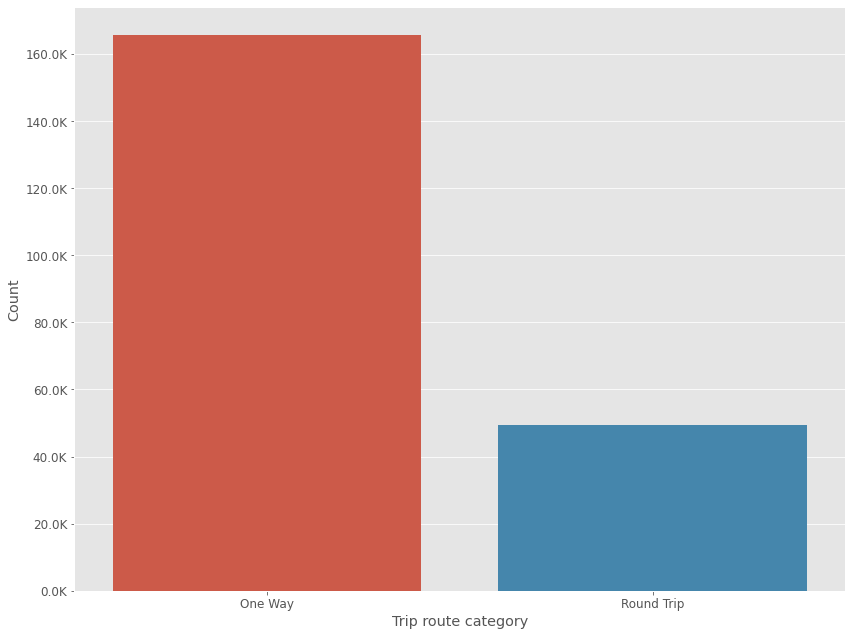

In [17]:
plot_bar(x=df_drop['trip_route_category'].value_counts().keys(), y=df_drop['trip_route_category'].value_counts().values,
         xlabel='Trip route category', ylabel='Count')

In [18]:
df_drop['trip_route_category'].value_counts(normalize=True)         # proportions

One Way       0.770203
Round Trip    0.229797
Name: trip_route_category, dtype: float64

<function __main__.plot_pie(series, label, shadow=None, startangle=None)>

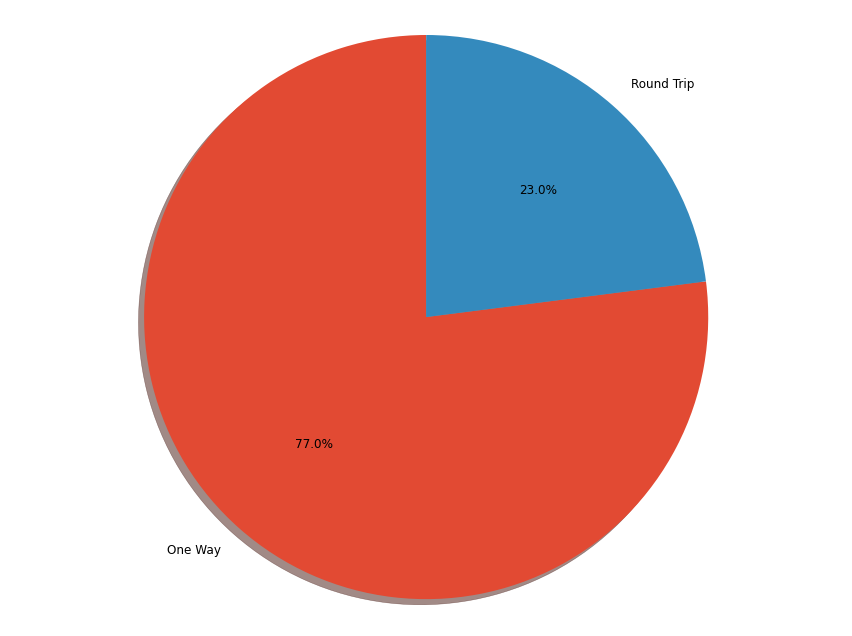

In [19]:
plot_pie(series=df_drop['trip_route_category'], label=df_drop['trip_route_category'], shadow=True, startangle=90)

The name of the passholder's plan

In [20]:
df_drop['passholder_type'].value_counts()                           # count

Monthly Pass    101397
Walk-up          67435
One Day Pass     25663
Annual Pass      20746
Testing              1
Name: passholder_type, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

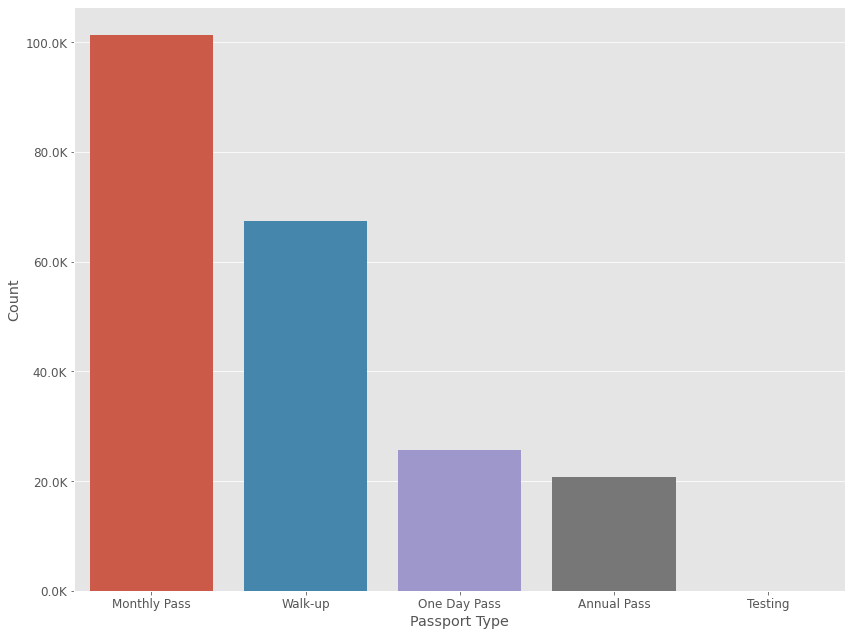

In [21]:
plot_bar(x=df_drop['passholder_type'].value_counts().keys(), y=df_drop['passholder_type'].value_counts().values,
         xlabel='Passport Type', ylabel='Count')

In [22]:
df_drop['passholder_type'].value_counts(normalize=True)             # proportions

Monthly Pass    0.471084
Walk-up         0.313299
One Day Pass    0.119229
Annual Pass     0.096385
Testing         0.000005
Name: passholder_type, dtype: float64

<function __main__.plot_pie(series, label, shadow=None, startangle=None)>

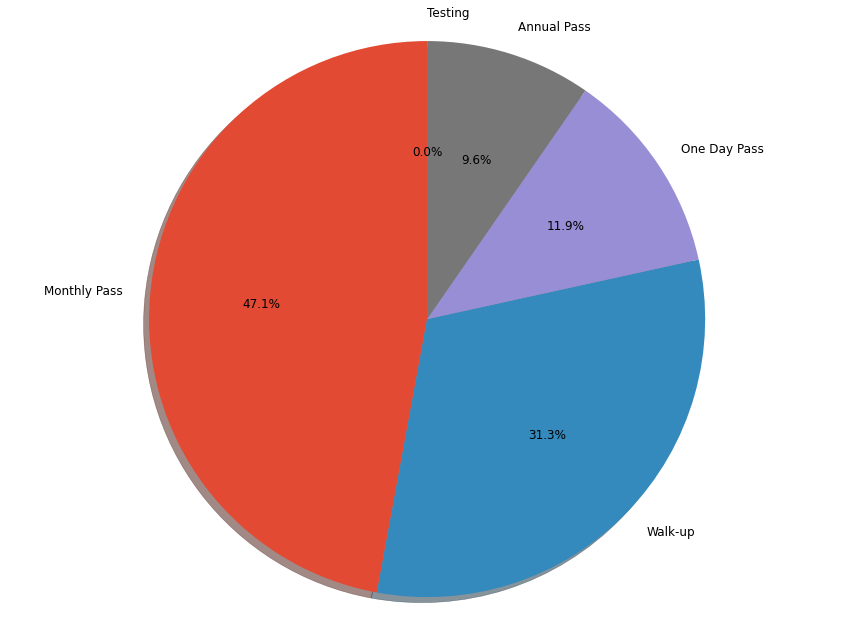

In [23]:
plot_pie(series=df_drop['passholder_type'], label=df_drop['passholder_type'], shadow=True, startangle=90)

The kind of bike used on the trip, including standard pedal-powered bikes, electric assist bikes, or smart bikes

In [24]:
df_drop['bike_type'].value_counts()

standard    161299
electric     52225
smart         1718
Name: bike_type, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

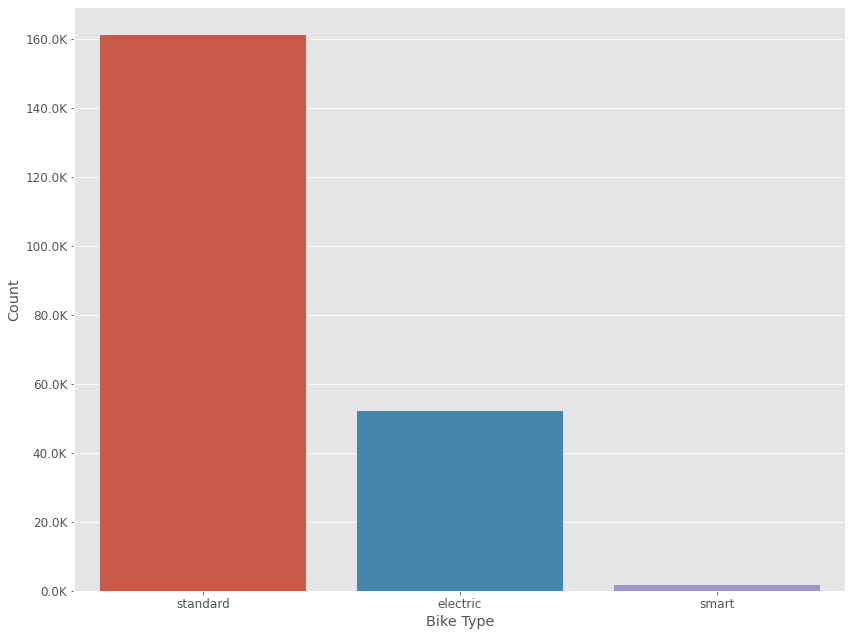

In [25]:
plot_bar(x=df_drop['bike_type'].value_counts().keys(), y=df_drop['bike_type'].value_counts().values,
         xlabel='Bike Type', ylabel='Count')

In [26]:
df_drop['bike_type'].value_counts(normalize=True)

standard    0.749384
electric    0.242634
smart       0.007982
Name: bike_type, dtype: float64

<function __main__.plot_pie(series, label, shadow=None, startangle=None)>

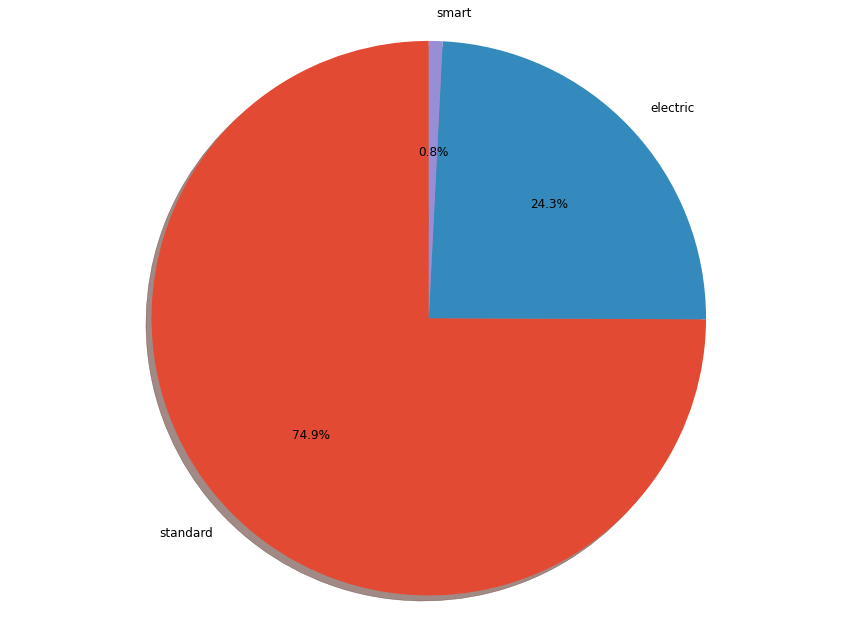

In [27]:
plot_pie(series=df_drop['bike_type'], label=df_drop['bike_type'], shadow=True, startangle=90)

In [28]:
df_drop['day_name'].value_counts()

Saturday     36860
Sunday       35966
Friday       31298
Thursday     28488
Tuesday      28165
Wednesday    27997
Monday       26468
Name: day_name, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

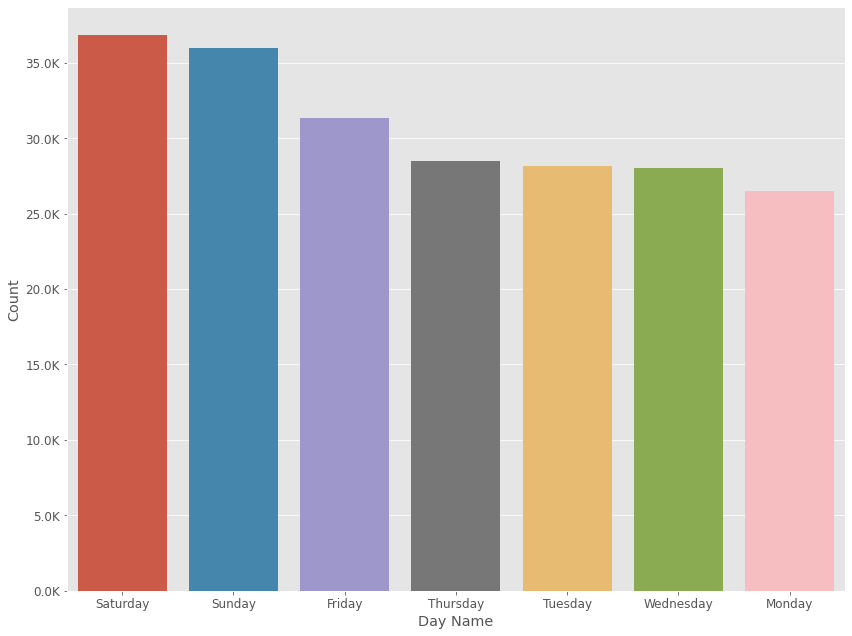

In [29]:
plot_bar(x=df_drop['day_name'].value_counts().keys(), y=df_drop['day_name'].value_counts().values,
         xlabel='Day Name', ylabel='Count')

In [30]:
df_drop['day_name'].value_counts(normalize=True)

Saturday     0.171249
Sunday       0.167096
Friday       0.145408
Thursday     0.132353
Tuesday      0.130853
Wednesday    0.130072
Monday       0.122969
Name: day_name, dtype: float64

<function __main__.plot_pie(series, label, shadow=None, startangle=None)>

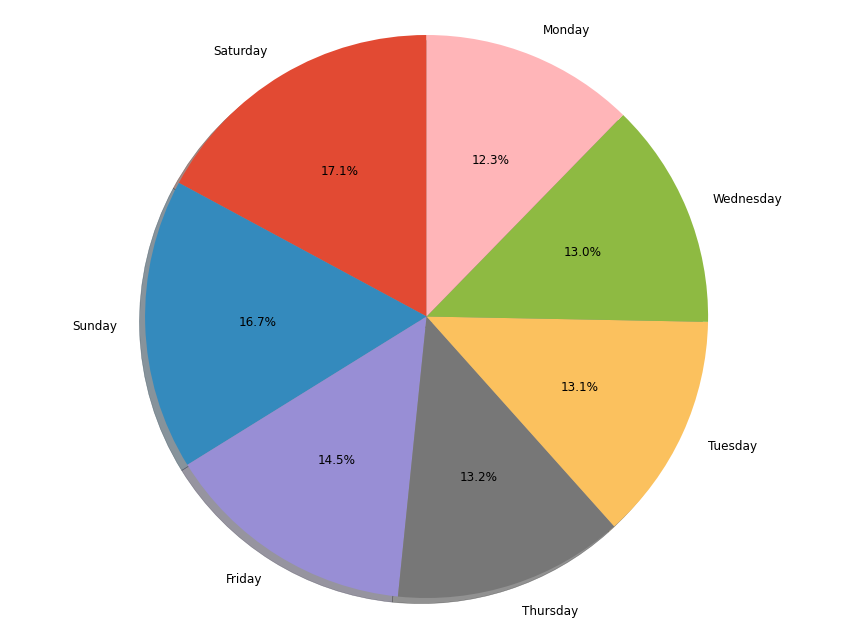

In [31]:
plot_pie(series=df_drop['day_name'], label=df_drop['day_name'], shadow=True, startangle=90)

In [32]:
df_drop['day'].value_counts()

10    8044
4     7759
20    7589
6     7462
18    7436
21    7425
17    7355
5     7336
11    7263
28    7256
16    7219
13    7136
3     7088
12    7033
24    7031
27    7030
19    6973
9     6897
1     6883
15    6807
22    6800
2     6757
8     6753
26    6712
14    6690
7     6676
30    6631
25    6583
23    6481
29    6125
31    4012
Name: day, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

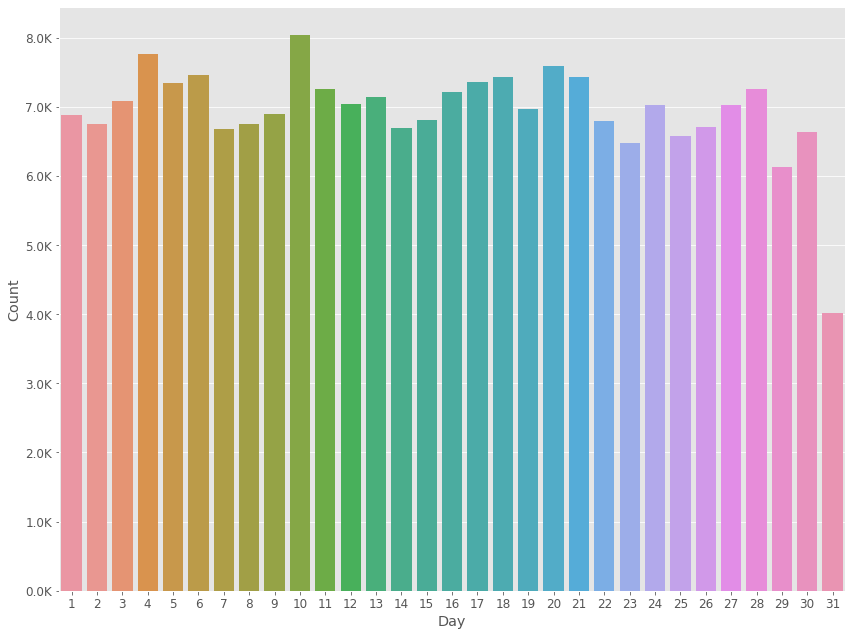

In [33]:
plot_bar(x=df_drop['day'].value_counts().keys(), y=df_drop['day'].value_counts().values,
         xlabel='Day', ylabel='Count')

In [34]:
df_drop['month'].value_counts()

9     34993
6     20725
7     20162
5     19919
8     19392
10    18451
4     16706
11    14583
3     14241
2     13156
1     12188
12    10726
Name: month, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

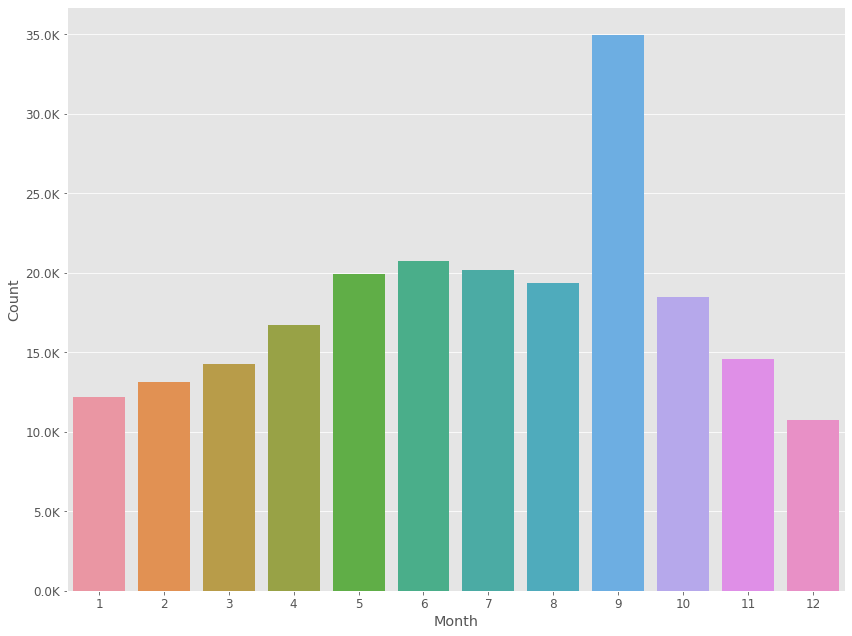

In [35]:
plot_bar(x=df_drop['month'].value_counts().keys(), y=df_drop['month'].value_counts().values,
         xlabel='Month', ylabel='Count')

In [36]:
df_drop['duration'].describe()

count    215242.000000
mean         40.369705
std          99.009098
min           1.000000
25%           9.000000
50%          19.000000
75%          35.000000
max        1440.000000
Name: duration, dtype: float64

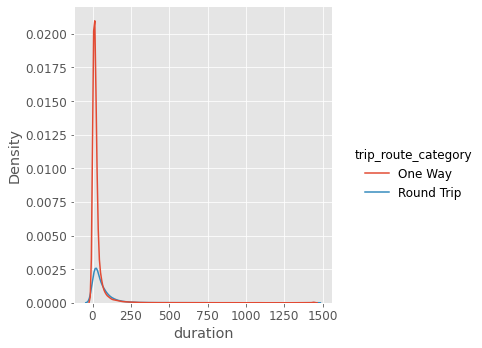

In [37]:
sns.displot(df_drop, x='duration', hue='trip_route_category', kind='kde')

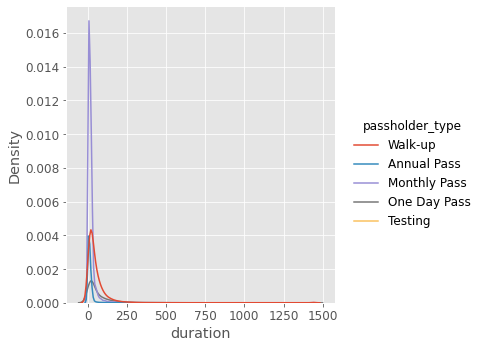

In [38]:
sns.displot(df_drop, x='duration', hue='passholder_type', kind='kde')

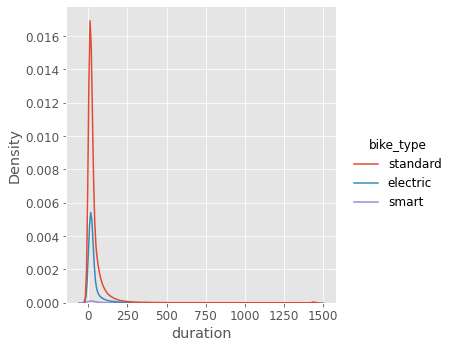

In [39]:
sns.displot(df_drop, x='duration', hue='bike_type', kind='kde')

# Time Resampling

In [40]:
df_idx = df_drop[['end_time', 'duration', 'trip_route_category', 'passholder_type', 'bike_type']].set_index('end_time')
df_idx

,duration,trip_route_category,passholder_type,bike_type
end_time,,,,
2021-01-01 02:02:00,17,One Way,Walk-up,standard
2021-01-01 02:42:00,7,One Way,Annual Pass,electric
2021-01-01 04:36:00,8,One Way,Monthly Pass,standard
2021-01-01 08:11:00,208,One Way,Walk-up,standard
2021-01-01 08:02:00,129,Round Trip,Walk-up,standard
...,...,...,...,...
2021-12-31 23:48:00,19,One Way,One Day Pass,standard
2021-12-31 23:48:00,8,One Way,Annual Pass,standard
2022-01-01 00:30:00,43,Round Trip,Walk-up,standard


In [41]:
# helper function to plot line charts
def plot_line(data, x, y, hue=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None):
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line 
    sns.lineplot(x=x, y=y, hue=hue, style=style, data=data, ci=ci, ax=ax)

    # label plot
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # y-axis formatter
    ax.yaxis.set_major_formatter(format_tsd)

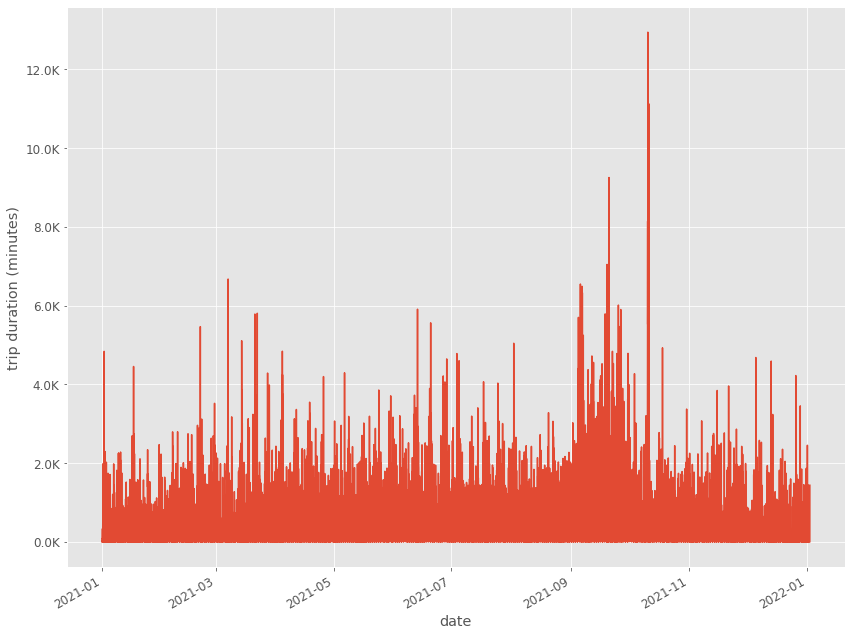

In [42]:
plot_line(
    x='end_time', y='duration', ci=None,
    data=df_idx.resample('30T').agg(np.sum),                             # total duration sampled every 30 minutes
    xlabel='date', ylabel='trip duration (minutes)'
)

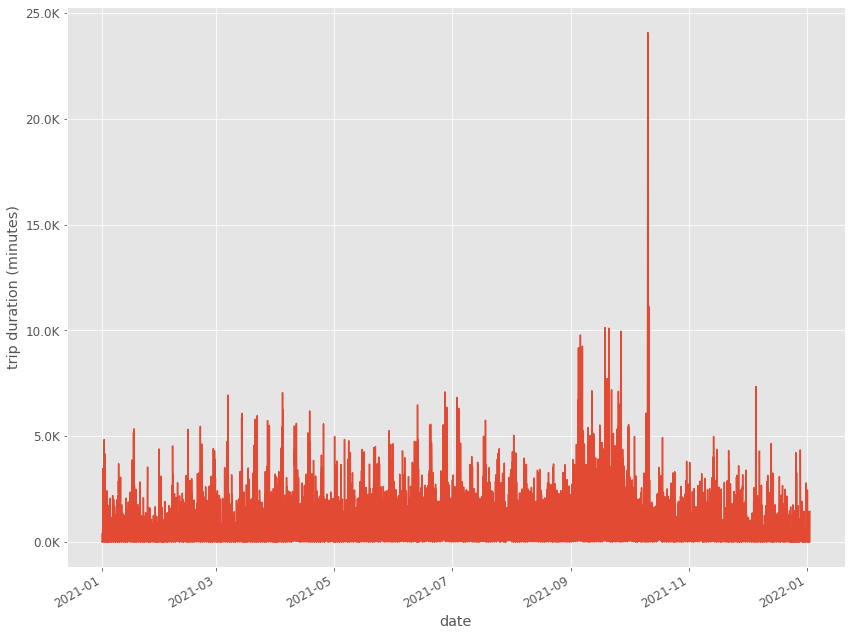

In [43]:
plot_line(
    x='end_time', y='duration', ci=None,
    data=df_idx.resample('1H').agg(np.sum),                             # total duration sampled hourly
    xlabel='date', ylabel='trip duration (minutes)'
)

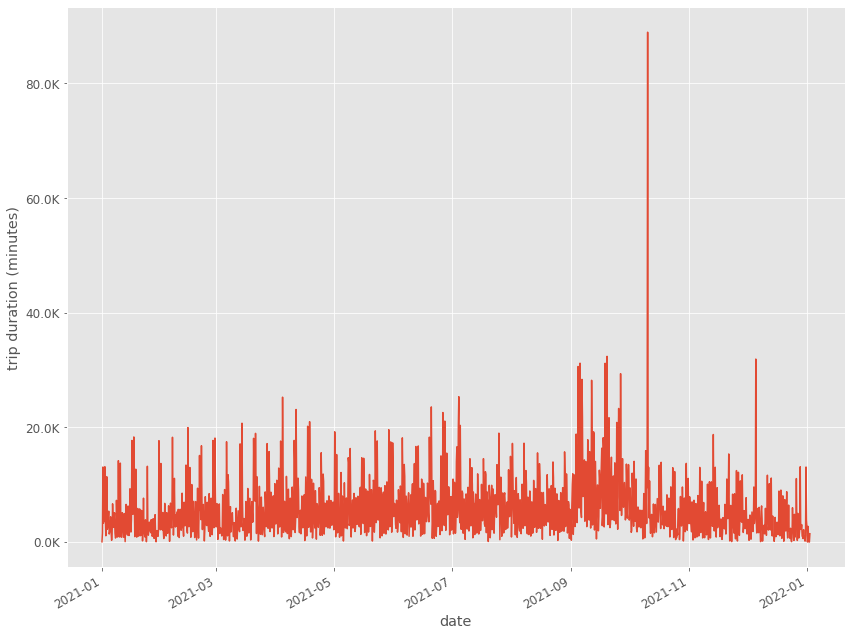

In [44]:
plot_line(
    x='end_time', y='duration', ci=None,
    data=df_idx.resample('6H').agg(np.sum),                             # total duration sampled every 6 hours
    xlabel='date', ylabel='trip duration (minutes)'
)

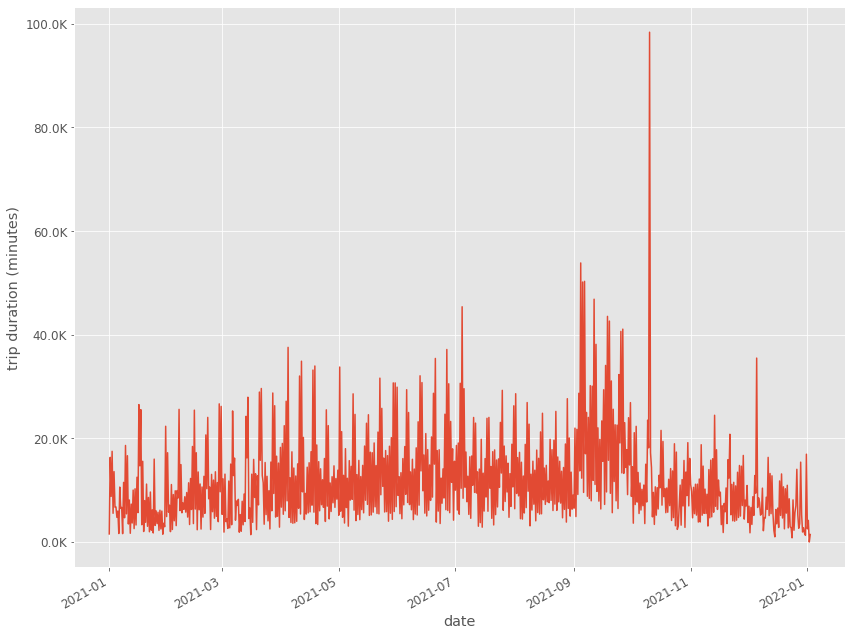

In [45]:
plot_line(
    x='end_time', y='duration', ci=None,
    data=df_idx.resample('12H').agg(np.sum),                             # total duration sampled every 12 hours
    xlabel='date', ylabel='trip duration (minutes)'
)

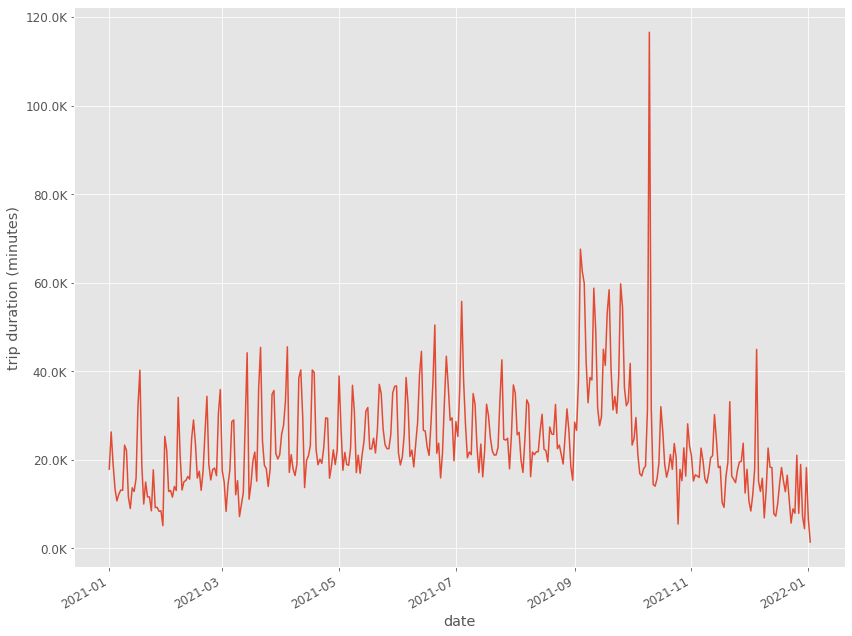

In [46]:
plot_line(
    x='end_time', y='duration', ci=None,
    data=df_idx.resample('D').agg(np.sum),                             # total duration sampled daily
    xlabel='date', ylabel='trip duration (minutes)'
)

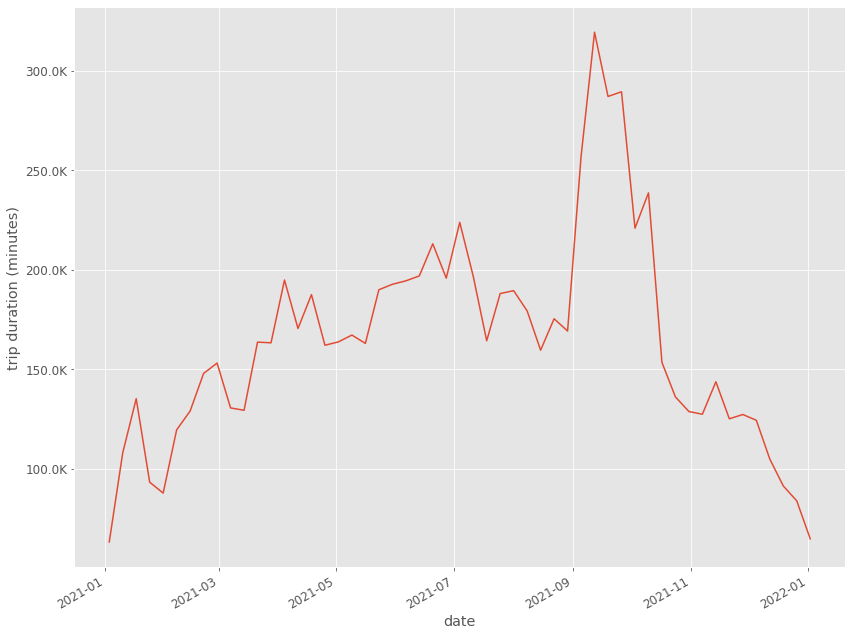

In [47]:
plot_line(
    x='end_time', y='duration', ci=None,
    data=df_idx.resample('W').agg(np.sum),                             # total duration sampled weekly
    xlabel='date', ylabel='trip duration (minutes)'
)

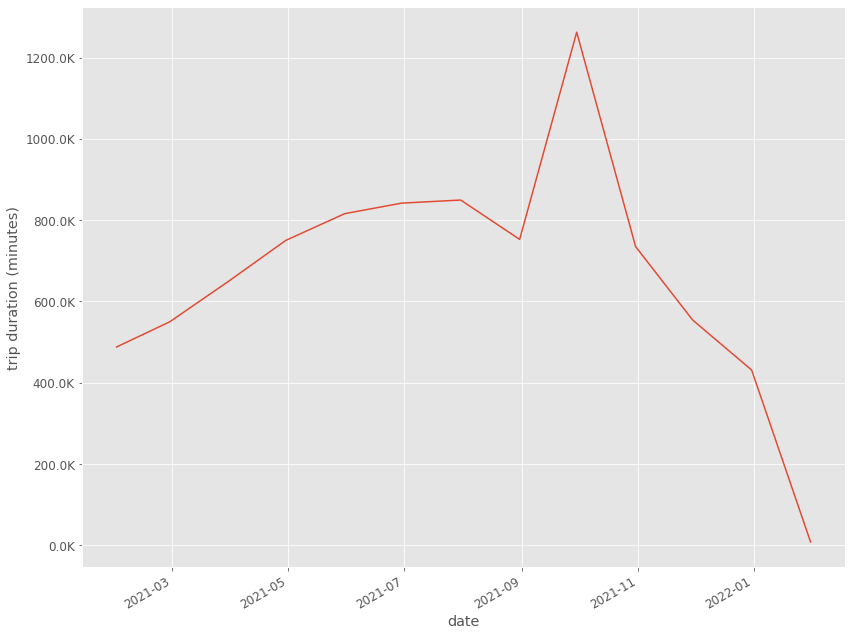

In [48]:
plot_line(
    x='end_time', y='duration', ci=None,
    data=df_idx.resample('M').agg(np.sum),                             # total duration sampled monthly
    xlabel='date', ylabel='trip duration (minutes)'
)

# Date Truncating or Indexing

In [49]:
# helper function to get specific date range
def get_samp_data(data, ascending=None, before=None, after=None, rule=None):
    return data.sort_index(ascending=ascending).truncate(before=before, after=after).resample(rule=rule)


# helper function to plot line chart
def plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    return plot_line_rng

<function __main__.plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None)>

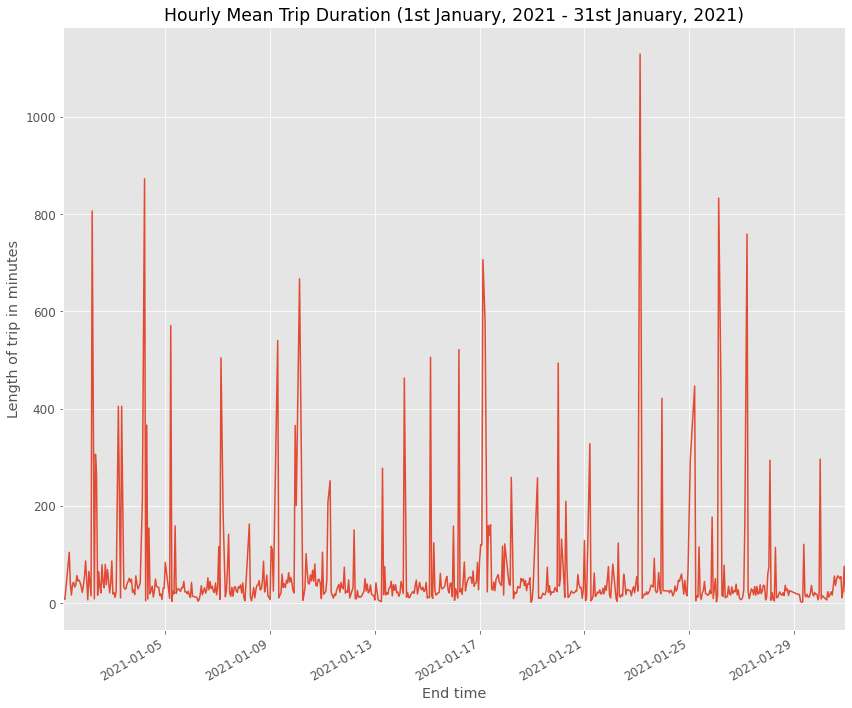

In [50]:
plot_line_rng(
    data=get_samp_data(data=df_idx, ascending=True, before='2021-01-01', after='2021-01-31', rule='1H').agg(np.mean),
    x='end_time', y='duration',
    xlabel='End time', ylabel='Length of trip in minutes', title='Hourly Mean Trip Duration (1st January, 2021 - 31st January, 2021)',
)

<function __main__.plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None)>

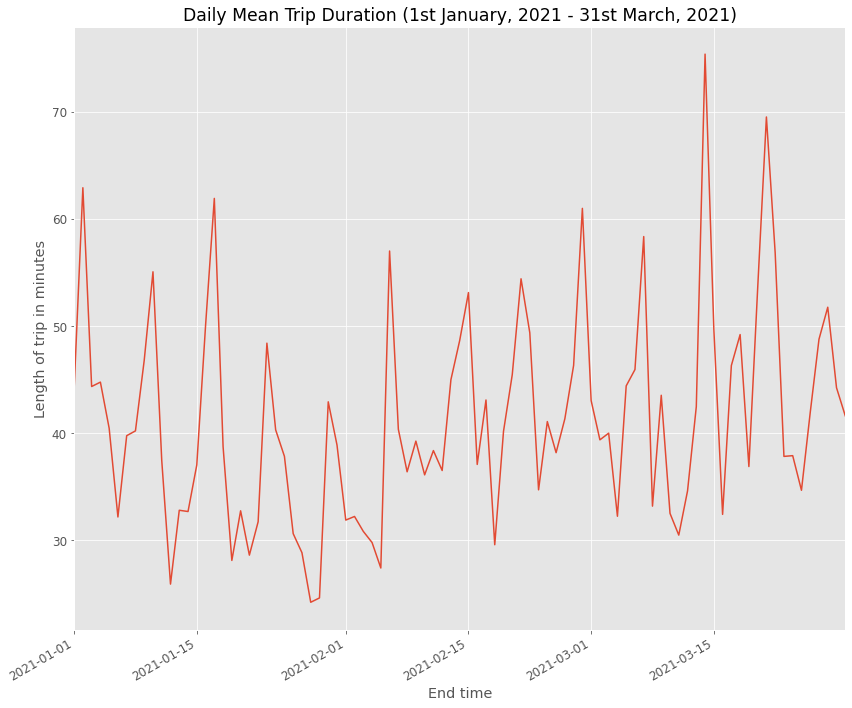

In [51]:
plot_line_rng(
    data=get_samp_data(data=df_idx, ascending=True, before='2021-01-01', after='2021-03-31', rule='D').agg(np.mean),
    x='end_time', y='duration',
    xlabel='End time', ylabel='Length of trip in minutes', title='Daily Mean Trip Duration (1st January, 2021 - 31st March, 2021)',
)

<function __main__.plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None)>

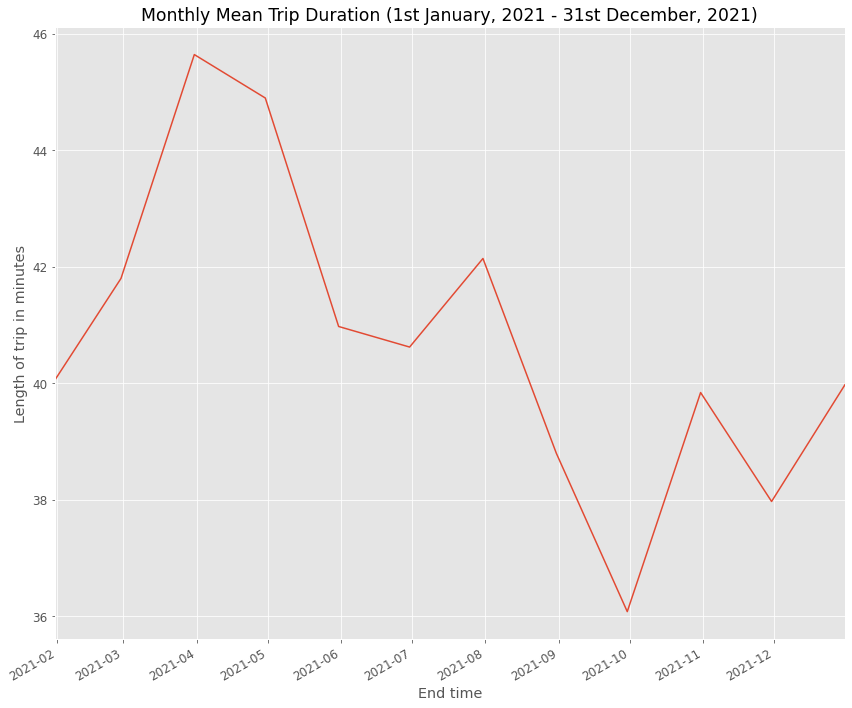

In [52]:
plot_line_rng(
    data=get_samp_data(data=df_idx, ascending=True, before='2021-01-01', after='2021-12-31', rule='M').agg(np.mean),
    x='end_time', y='duration',
    xlabel='End time', ylabel='Length of trip in minutes', title='Monthly Mean Trip Duration (1st January, 2021 - 31st December, 2021)',
)